In [275]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import mixture
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from sklearn.model_selection import GridSearchCV
from shapely.ops import unary_union, polygonize
import math
import shapely.geometry as geometry
import shapely
from scipy.spatial import Delaunay
from joblib import dump, load

# Open csv data

In [276]:
df = pd.read_csv('../raw_data/salinity.csv')

In [277]:
df

Longitude   Latitude                 Time      10.0       11.0  \
0    -49.859211  40.331425  2021-01-11 04:41:00  35.69900  35.699200   
1    -49.801770  34.450870  2021-01-04 15:20:55  36.62799  36.627995   
2    -49.745522  41.780010  2021-01-01 05:14:00  32.88900  32.889330   
3    -49.491241  40.397091  2021-01-31 05:02:00  33.72000  33.722168   
4    -49.142710  36.750300  2021-01-21 09:07:20  36.59199  36.591988   
...         ...        ...                  ...       ...        ...   
2755 -20.894335  43.537510  2022-12-25 06:18:30  35.89700  35.896000   
2756 -20.709370  43.291202  2022-12-15 06:19:30  35.89900  35.900000   
2757 -20.664273  30.275992  2022-12-29 23:47:30  37.14700  37.150000   
2758 -20.491088  30.329675  2022-12-19 18:51:30  37.18200  37.182000   
2759 -20.255065  30.240242  2022-12-09 13:55:30  37.16100  37.161000   

           12.0      13.0       14.0       15.0       16.0  ...     1992.0  \
0     35.699400  35.69960  35.699802  35.700000  35.699726  ...  34.928000   
1     36.628000  36.62800  36.628000  36.627975  36.627950  ...  34.968940   
2     32.889668  32.89000  32.890330  32.890667  32.891000  ...  34.929000   
3     33.724335  33.72650  33.728670  33.730835  33.733000  ...  34.950000   
4     36.591980  36.59149  36.591000  36.591010  36.591020  ...  34.970120   
...         ...       ...        ...        ...        ...  ...        ...   
2755  35.896000  35.89700  35.897000  35.897000  35.896000  ...  34.979000   
2756  35.899498  35.89900  35.899000  35.899000  35.899000  ...  35.001000   
2757  37.149000  37.14900  37.150000  37.149000  37.149000  ...  35.153330   
2758  37.182000  37.17900  37.178000  37.180000  37.182000  ...  35.148598   
2759  37.161000  37.16100  37.163000  37.162000  37.163000  ...  35.169000   

         1993.0    1994.0     1995.0    1996.0     1997.0    1998.0  \
0     34.928000  34.92800  34.928000  34.92800  34.928000  34.92800   
1     34.969444  34.96995  34.969963  34.96997  34.969720  34.96947   
2     34.929000  34.92900  34.929000  34.92900  34.929000  34.92900   
3     34.950000  34.95000  34.950000  34.95000  34.950000  34.95000   
4     34.970135  34.97015  34.970123  34.97010  34.970093  34.97009   
...         ...       ...        ...       ...        ...       ...   
2755  34.979000  34.97900  34.979000  34.97900  34.979000  34.97900   
2756  35.001000  35.00100  35.001000  35.00100  35.001000  35.00100   
2757  35.153168  35.15300  35.152500  35.15200  35.151500  35.15100   
2758  35.148000  35.14760  35.147198  35.14680  35.146400  35.14600   
2759  35.169000  35.16900  35.169000  35.16900  35.169000  35.16900   

         1999.0    2000.0    2001.0  
0     34.928000  34.92800  34.92800  
1     34.970993  34.97252  34.97252  
2     34.929000  34.92900  34.92900  
3     34.950000  34.95000  34.95000  
4     34.970090  34.97009  34.97009  
...         ...       ...       ...  
2755  34.979000  34.97900  34.97900  
2756  35.001000  35.00100  35.00100  
2757  35.151000  35.15100  35.15100  
2758  35.146000  35.14600  35.14600  
2759  35.169000  35.16900  35.16900  

[2760 rows x 1995 columns]

# Define data for the model

In [278]:
pres = df.columns[3:].values

In [279]:
lon = df.iloc[:,0].values
lat = df.iloc[:,1].values

In [280]:
X = df.iloc[:,3:].values

In [281]:
X.shape

(2760, 1992)

# Scale data

In [282]:
Xscaled = preprocessing.scale(X)

# First model analysis

In [283]:
pca = PCA()

In [284]:
pca.fit(Xscaled)

PCA()

In [285]:
Xpca = pca.transform(Xscaled)

In [286]:
pca.components_.shape

(1992, 1992)

## Verify pca components

In [287]:
X_proj = pd.DataFrame(Xpca, columns=[f'PC{i}' for i in range(1, pca.components_.shape[0]+1)])
X_proj

PC1        PC2        PC3        PC4       PC5       PC6  \
0    -45.682867  20.999925  -5.848032 -18.494417  8.802011 -4.455946   
1     28.926100 -40.083466 -10.392625  16.902317 -2.204229 -1.673037   
2    -52.758788  35.300877   1.841581   8.405027 -6.627544  1.307699   
3    -45.114980  38.476477   5.258347  14.201990 -5.205289 -1.020564   
4     22.162710 -35.105428  -9.524556  12.148070 -2.252260 -0.730623   
...         ...        ...        ...        ...       ...       ...   
2755  24.928733   1.406391  34.872610   0.944519  7.768347  9.649165   
2756  40.044838  11.024943  30.871770  -3.745504 -3.006771 -1.237397   
2757  58.816974   6.275742  -4.091831 -12.777998 -1.325593 -8.958835   
2758  56.371656   5.204666  -5.924374 -13.039084 -1.151748 -9.190874   
2759  56.486104   4.194804  -4.990398 -12.993962 -0.241695 -8.296884   

           PC7       PC8       PC9       PC10  ...        PC1983  \
0     1.307980  7.000570 -5.210478  10.802832  ... -3.913215e-06   
1     0.540727  1.701326 -0.393657   0.792639  ... -4.123588e-06   
2    -6.413437  1.723955  0.078749   0.572781  ...  1.279820e-05   
3    -0.565215 -4.450714 -0.736976  -0.905323  ... -2.028709e-05   
4     0.131430  0.182463 -1.719165  -1.018081  ... -1.582812e-07   
...        ...       ...       ...        ...  ...           ...   
2755  1.173690  1.259027  0.882099  -0.689178  ... -2.464385e-07   
2756 -1.656160 -0.638397  0.322531  -1.893679  ...  6.338872e-07   
2757 -1.128260 -1.321841  1.111915   1.607861  ...  2.104049e-06   
2758  0.118997  0.621445 -0.534014   1.424630  ... -4.228049e-07   
2759 -0.757076 -0.029361  0.024814   1.224670  ... -1.197576e-07   

            PC1984        PC1985        PC1986        PC1987        PC1988  \
0    -6.365714e-06 -3.331679e-06 -4.429551e-06  4.224906e-07 -2.974624e-06   
1     2.361402e-06  1.484836e-06 -2.718522e-06 -4.898597e-07  3.003324e-06   
2    -5.508000e-07  2.600524e-05 -2.201342e-05  2.115142e-06  3.983099e-07   
3     5.775784e-06 -1.151436e-05 -2.485045e-05 -5.700476e-06  9.315490e-06   
4     1.107501e-06  2.591035e-06  4.885543e-07 -6.307010e-07  1.427330e-06   
...            ...           ...           ...           ...           ...   
2755  1.632411e-07  2.688246e-06  3.056527e-06  6.335657e-07  2.048872e-06   
2756 -1.662550e-06  8.705152e-07 -1.089403e-06 -8.519894e-07  1.901602e-06   
2757  1.007423e-06 -1.593793e-06  1.190921e-07 -6.491264e-07 -1.313111e-06   
2758  1.824333e-06  3.801150e-07 -1.186409e-07  6.467215e-07 -1.062848e-06   
2759 -1.410342e-07 -1.872950e-06 -1.191076e-06  5.560481e-07 -9.055099e-08   

            PC1989        PC1990        PC1991        PC1992  
0     7.906479e-06  1.041950e-05  9.219851e-06 -1.236441e-09  
1    -5.043957e-06  6.279425e-06  4.685880e-06 -1.906976e-08  
2    -9.487350e-06  4.258815e-06 -1.869115e-05 -9.459011e-09  
3    -2.082199e-06  7.570808e-06  2.038599e-07  1.056991e-08  
4    -5.541424e-08  3.081342e-06 -1.293335e-06 -4.134238e-09  
...            ...           ...           ...           ...  
2755  9.384294e-07  4.864109e-07  9.316968e-07 -4.355951e-09  
2756 -9.034523e-07  3.389887e-07  3.895896e-07 -3.326184e-09  
2757 -2.326969e-06 -1.309368e-06  3.984581e-07 -1.189362e-08  
2758  7.534385e-07 -1.708211e-06  2.529449e-06 -1.610732e-08  
2759  1.641710e-06  1.797692e-06 -5.627810e-07  2.520422e-09  

[2760 rows x 1992 columns]

<Axes: >

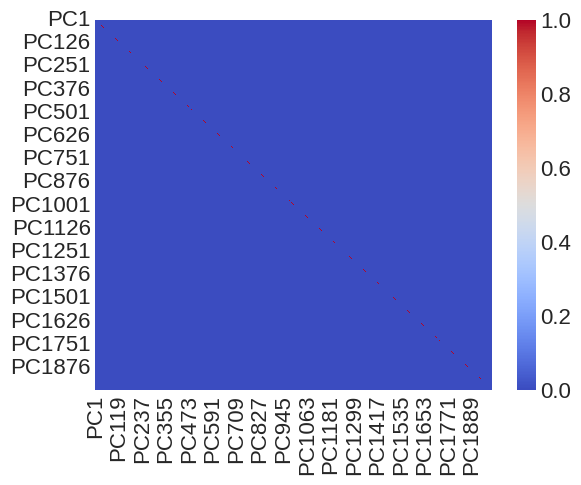

In [288]:
sns.heatmap(X_proj.corr(), cmap='coolwarm')

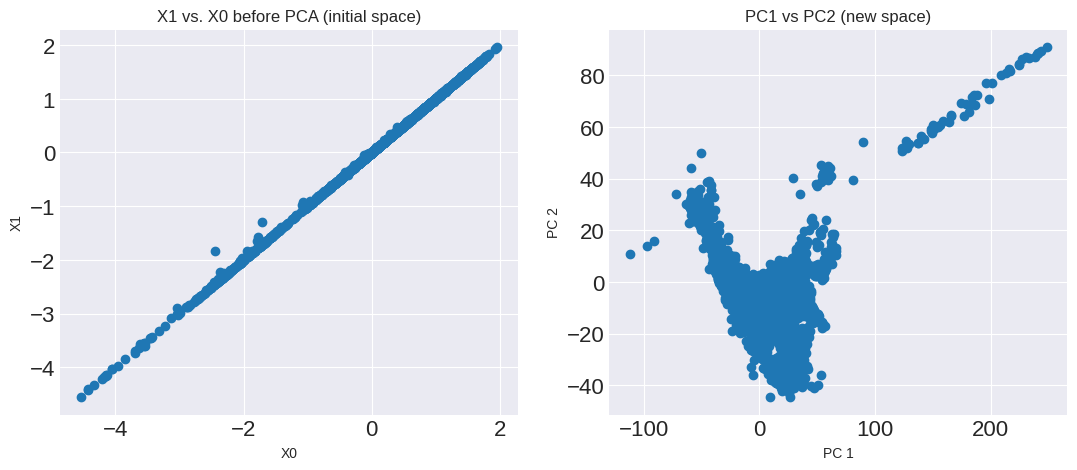

In [289]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(Xscaled[:,0], Xscaled[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

In [290]:
# Computational proof
W = pca.components_.T
print("Shape of W: ", W.shape)
print("Shape of X", Xscaled.shape)

Shape of W:  (1992, 1992)
Shape of X (2760, 1992)


In [291]:
pca.explained_variance_ratio_.cumsum()[0:10]

array([0.73553243, 0.90369279, 0.96415145, 0.98236176, 0.98762471,
       0.99038775, 0.99210253, 0.99346661, 0.99444014, 0.995197  ])

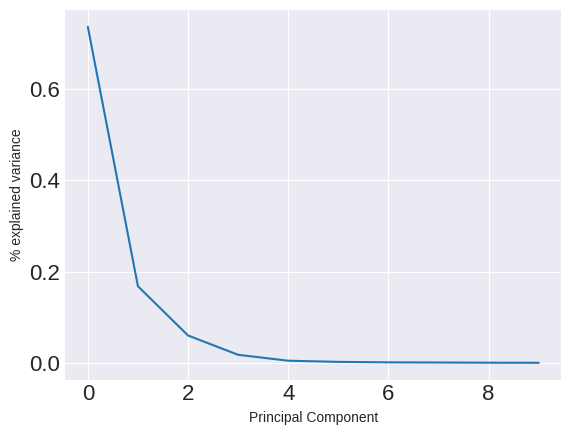

In [292]:
plt.plot(pca.explained_variance_ratio_[0:10])
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

We can see that with only a few PCA components we can explain 99.9% of the covariance of the data

In [293]:
pca = PCA(n_components=10)
pca.fit(Xscaled)
Xpca = pca.transform(Xscaled)

In [294]:
Xpca

array([[-4.56828672e+01,  2.09999249e+01, -5.84803208e+00, ...,
         7.00057006e+00, -5.21047772e+00,  1.08028332e+01],
       [ 2.89260997e+01, -4.00834661e+01, -1.03926252e+01, ...,
         1.70132558e+00, -3.93657361e-01,  7.92638570e-01],
       [-5.27587879e+01,  3.53008766e+01,  1.84158118e+00, ...,
         1.72395547e+00,  7.87486018e-02,  5.72780474e-01],
       ...,
       [ 5.88169740e+01,  6.27574246e+00, -4.09183055e+00, ...,
        -1.32184127e+00,  1.11191515e+00,  1.60786076e+00],
       [ 5.63716565e+01,  5.20466635e+00, -5.92437437e+00, ...,
         6.21445065e-01, -5.34013926e-01,  1.42462995e+00],
       [ 5.64861035e+01,  4.19480421e+00, -4.99039757e+00, ...,
        -2.93605709e-02,  2.48143860e-02,  1.22467008e+00]])

# Train the unsupervised ML model

## Loss function

In [295]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

## Train the model with grid search to define the best params with the best score

In [296]:
# Instantiate model
model = mixture.GaussianMixture()

param_grid = {
    "n_components": range(2, 12),
    "covariance_type": ["full"],
#     "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    model, param_grid=param_grid, scoring=gmm_bic_score, verbose=2
)
grid_search.fit(Xpca)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............covariance_type=full, n_components=2; total time=   0.1s
[CV] END ...............covariance_type=full, n_components=2; total time=   0.1s
[CV] END ...............covariance_type=full, n_components=2; total time=   0.1s
[CV] END ...............covariance_type=full, n_components=2; total time=   0.1s
[CV] END ...............covariance_type=full, n_components=2; total time=   0.1s
[CV] END ...............covariance_type=full, n_components=3; total time=   0.1s
[CV] END ...............covariance_type=full, n_components=3; total time=   0.2s
[CV] END ...............covariance_type=full, n_components=3; total time=   0.1s
[CV] END ...............covariance_type=full, n_components=3; total time=   0.2s
[CV] END ...............covariance_type=full, n_components=3; total time=   0.1s
[CV] END ...............covariance_type=full, n_components=4; total time=   0.1s
[CV] END ...............covariance_type=full, n_

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['full'],
                         'n_components': range(2, 12)},
             scoring=<function gmm_bic_score at 0x7f5794f3e9e0>, verbose=2)

In [297]:
comp_df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
comp_df["mean_test_score"] = -comp_df["mean_test_score"]
comp_df = comp_df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
comp_df.sort_values(by="BIC score").head()

Number of components Type of covariance     BIC score
4                    6               full  28553.717866
3                    5               full  28753.334197
5                    7               full  28856.831632
2                    4               full  29028.843692
6                    8               full  29171.531957

We can see that the best model is with 6 components

/home/tobfer/.pyenv/versions/3.10.6/envs/ohw/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


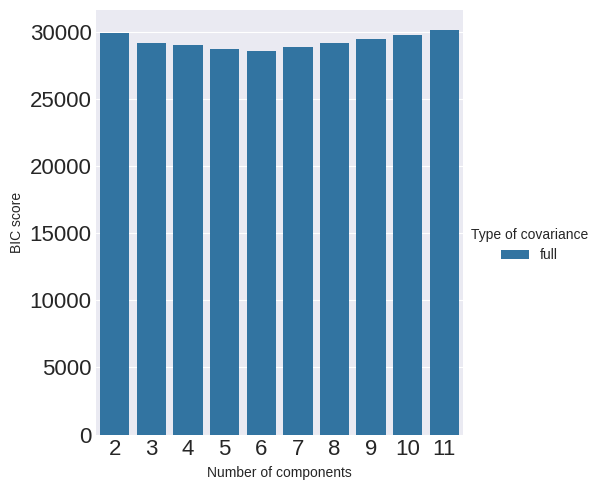

In [298]:
sns.catplot(
    data=comp_df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

## Prepare the data for data plotting

In [299]:
labels = grid_search.predict(Xpca)

In [300]:
# find posterior probabilities (the probabilities of belonging to each class)
posterior_probs = grid_search.predict_proba(Xpca)

In [301]:
# maximum posterior probability (the class is assigned based on this value)
max_posterior_probs = np.max(posterior_probs,axis=1) 

In [302]:
df.shape

(2760, 1995)

In [303]:
# put the labels and maximum posterior probabilities back in original dataframe
df.insert(2,'label',labels,True)
df.insert(3,'max posterior prob',max_posterior_probs,True) 
df

Longitude   Latitude  label  max posterior prob                 Time  \
0    -49.859211  40.331425      0            1.000000  2021-01-11 04:41:00   
1    -49.801770  34.450870      1            1.000000  2021-01-04 15:20:55   
2    -49.745522  41.780010      3            1.000000  2021-01-01 05:14:00   
3    -49.491241  40.397091      3            1.000000  2021-01-31 05:02:00   
4    -49.142710  36.750300      1            1.000000  2021-01-21 09:07:20   
...         ...        ...    ...                 ...                  ...   
2755 -20.894335  43.537510      4            1.000000  2022-12-25 06:18:30   
2756 -20.709370  43.291202      4            1.000000  2022-12-15 06:19:30   
2757 -20.664273  30.275992      4            1.000000  2022-12-29 23:47:30   
2758 -20.491088  30.329675      4            0.999993  2022-12-19 18:51:30   
2759 -20.255065  30.240242      4            0.999987  2022-12-09 13:55:30   

          10.0       11.0       12.0      13.0       14.0  ...     1992.0  \
0     35.69900  35.699200  35.699400  35.69960  35.699802  ...  34.928000   
1     36.62799  36.627995  36.628000  36.62800  36.628000  ...  34.968940   
2     32.88900  32.889330  32.889668  32.89000  32.890330  ...  34.929000   
3     33.72000  33.722168  33.724335  33.72650  33.728670  ...  34.950000   
4     36.59199  36.591988  36.591980  36.59149  36.591000  ...  34.970120   
...        ...        ...        ...       ...        ...  ...        ...   
2755  35.89700  35.896000  35.896000  35.89700  35.897000  ...  34.979000   
2756  35.89900  35.900000  35.899498  35.89900  35.899000  ...  35.001000   
2757  37.14700  37.150000  37.149000  37.14900  37.150000  ...  35.153330   
2758  37.18200  37.182000  37.182000  37.17900  37.178000  ...  35.148598   
2759  37.16100  37.161000  37.161000  37.16100  37.163000  ...  35.169000   

         1993.0    1994.0     1995.0    1996.0     1997.0    1998.0  \
0     34.928000  34.92800  34.928000  34.92800  34.928000  34.92800   
1     34.969444  34.96995  34.969963  34.96997  34.969720  34.96947   
2     34.929000  34.92900  34.929000  34.92900  34.929000  34.92900   
3     34.950000  34.95000  34.950000  34.95000  34.950000  34.95000   
4     34.970135  34.97015  34.970123  34.97010  34.970093  34.97009   
...         ...       ...        ...       ...        ...       ...   
2755  34.979000  34.97900  34.979000  34.97900  34.979000  34.97900   
2756  35.001000  35.00100  35.001000  35.00100  35.001000  35.00100   
2757  35.153168  35.15300  35.152500  35.15200  35.151500  35.15100   
2758  35.148000  35.14760  35.147198  35.14680  35.146400  35.14600   
2759  35.169000  35.16900  35.169000  35.16900  35.169000  35.16900   

         1999.0    2000.0    2001.0  
0     34.928000  34.92800  34.92800  
1     34.970993  34.97252  34.97252  
2     34.929000  34.92900  34.92900  
3     34.950000  34.95000  34.95000  
4     34.970090  34.97009  34.97009  
...         ...       ...       ...  
2755  34.979000  34.97900  34.97900  
2756  35.001000  35.00100  35.00100  
2757  35.151000  35.15100  35.15100  
2758  35.146000  35.14600  35.14600  
2759  35.169000  35.16900  35.16900  

[2760 rows x 1997 columns]

In [308]:
# group profiles according to label
grouped_unsorted = df.groupby('label')

In [309]:
# calculate mean of all profiles in each class
df_means = grouped_unsorted.agg({k: 'first' if k == 'Time' else np.mean for k in df.columns})

In [310]:
n_comp = grid_search.best_estimator_.n_components

In [311]:
# extrat sea surface temperatures (SSTs)
T15_means = df_means['15.0'].values

# sort mean temperatuer at 15 dbar from coldest to warmest
old2new = np.argsort(T15_means)

# create dictionary object for sorting
di = dict(zip(old2new,range(0,n_comp)))

# add new column to dataframe - sorted label
df.insert(3,'label_sorted',df['label'].map(di))

In [312]:
# group profiles according to label
grouped = df.groupby('label_sorted')

# calculate mean of all profiles in each class
dfg_means = grouped.agg({k: 'first' if k == 'Time' else np.mean for k in df.columns})

# calculate stdevs of all profiles in each class
dfg_stds = grouped.agg({k: 'first' if k == 'Time' else np.std for k in df.columns})

# number or profiles in each class
nprofs = grouped['Latitude'].count().values

In [313]:
print(dfg_means['15.0'])

label_sorted
0    33.908896
1    35.547349
2    35.750889
3    36.263814
4    36.453005
5    36.884772
Name: 15.0, dtype: float64


In [314]:
p = np.asarray([float(i) for i in pres])

In [315]:
p.shape

(1992,)

In [316]:
dfg_means

Longitude   Latitude  label  label_sorted  max posterior prob  \
label_sorted                                                                  
0            -43.471487  47.955158    3.0           0.0            0.987005   
1            -34.469203  46.058941    0.0           1.0            0.969386   
2            -21.590986  45.078706    5.0           2.0            0.990938   
3            -25.994088  38.580667    4.0           3.0            0.940751   
4            -38.405076  37.747634    1.0           4.0            0.940305   
5            -26.784770  33.460504    2.0           5.0            1.000000   

                             Time       10.0       11.0       12.0       13.0  \
label_sorted                                                                    
0             2021-01-01 05:14:00  33.873611  33.879802  33.885754  33.893015   
1             2021-01-11 04:41:00  35.533913  35.536038  35.538932  35.541742   
2             2021-01-30 06:26:20  35.750879  35.750808  35.750880  35.750667   
3             2021-01-29 04:33:30  36.263430  36.263450  36.263408  36.263497   
4             2021-01-04 15:20:55  36.449974  36.450254  36.450814  36.451457   
5             2021-01-07 15:39:51  36.885330  36.885072  36.885059  36.885442   

              ...     1992.0     1993.0     1994.0     1995.0     1996.0  \
label_sorted  ...                                                          
0             ...  34.910194  34.910201  34.910205  34.910210  34.910212   
1             ...  34.923128  34.923138  34.923149  34.923174  34.923200   
2             ...  34.925825  34.925811  34.925834  34.925785  34.925862   
3             ...  35.069746  35.069678  35.069619  35.069565  35.069483   
4             ...  34.980522  34.980498  34.980472  34.980439  34.980411   
5             ...  36.238729  36.238729  36.238729  36.238729  36.238729   

                 1997.0     1998.0     1999.0     2000.0     2001.0  
label_sorted                                                         
0             34.910219  34.910225  34.910229  34.910232  34.910232  
1             34.923219  34.923237  34.923246  34.923246  34.923246  
2             34.925827  34.925886  34.925884  34.925900  34.925900  
3             35.069412  35.069332  35.069318  35.069308  35.069308  
4             34.980395  34.980378  34.980366  34.980356  34.980356  
5             36.238729  36.238729  36.238729  36.238729  36.238729  

[6 rows x 1998 columns]

/tmp/ipykernel_16455/3197970315.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


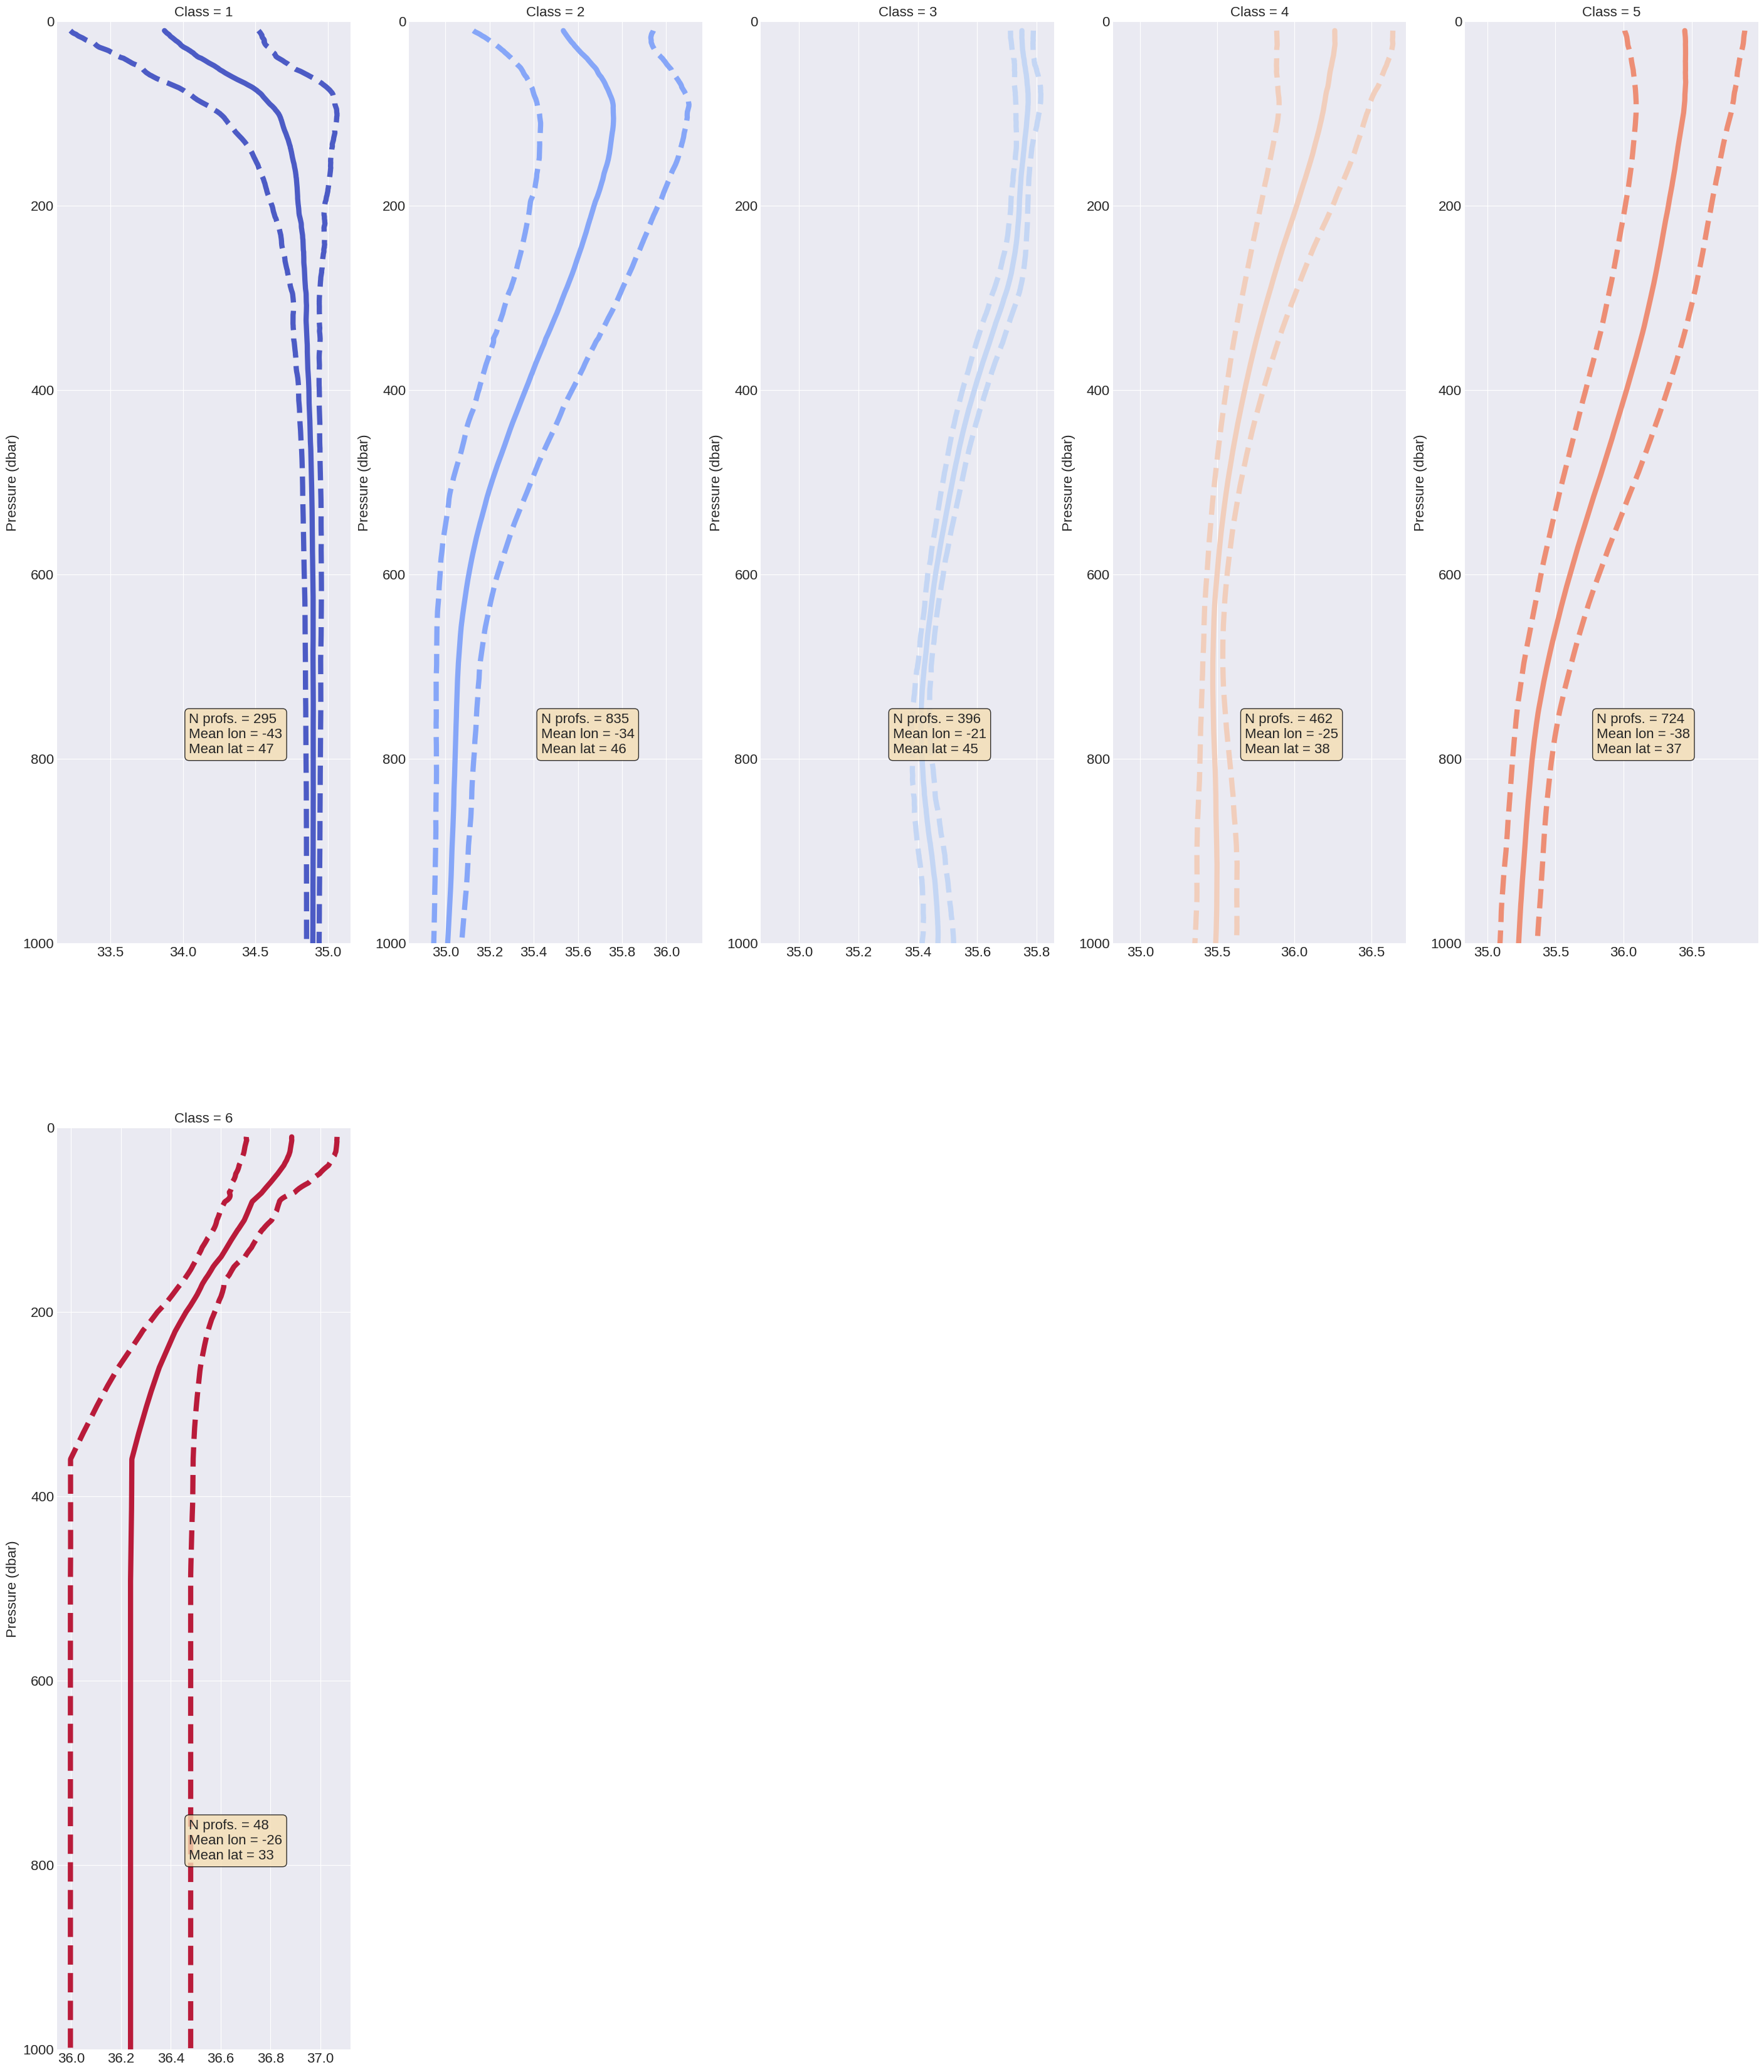

In [318]:
# initialize the figure
plt.figure(figsize=(35, 42))
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = cm.coolwarm(np.linspace(0,1,n_comp))

# iterate over groups
num = 0
for nrow in range(0,n_comp):
    num += 1
    
    # extract means
    mean_lon = dfg_means.iloc[nrow,0]
    mean_lat = dfg_means.iloc[nrow,1]
    mean_T = dfg_means.iloc[nrow,6:].values
    
    # extract stdevs
    std_lon = dfg_stds.iloc[nrow,0]
    std_lat = dfg_stds.iloc[nrow,1]
    std_T = dfg_stds.iloc[nrow,6:].values
    
    # select subplot
    plt.subplot(int(np.ceil(n_comp/5)),5,num)
    plt.plot(mean_T, p, marker='', linestyle='solid', color=palette[nrow], linewidth=6.0, alpha=0.9)
    plt.plot(mean_T+std_T, p, marker='', linestyle='dashed', color=palette[nrow], linewidth=6.0, alpha=0.9)
    plt.plot(mean_T-std_T, p, marker='', linestyle='dashed', color=palette[nrow], linewidth=6.0, alpha=0.9)
    
    # custom grid and axes
    plt.ylim([0,1000])
    ax = plt.gca()
    ax.invert_yaxis() 
#     plt.xlim([-2, 20])
    ax.grid(True)
    
    fs = 16 # font size
#     plt.xlabel('Temperature (°C)', fontsize=fs)
    plt.ylabel('Pressure (dbar)', fontsize=fs)
    plt.title('Class = ' + str(num), fontsize=fs)
    mpl.rc('xtick', labelsize=fs)     
    mpl.rc('ytick', labelsize=fs)
    
    # text box
    textstr = '\n'.join((
        r'N profs. = %i' % (nprofs[nrow], ),
        r'Mean lon = %i' % (mean_lon, ),
        r'Mean lat = %i' % (mean_lat, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    # place a text box in upper left in axes coords
    ax.text(0.45, 0.25, textstr, transform=ax.transAxes, fontsize=fs,
            verticalalignment='top', bbox=props)
    
plt.show()
    

# Create the polygons for data QC

## Convex hull

In [319]:
points = []
for i, value in enumerate(mean_T):
    points.append([value-std_T[i], float(pres[i])])
    points.append([value+std_T[i], float(pres[i])])
points = np.array(points)

In [320]:
hull = ConvexHull(points)

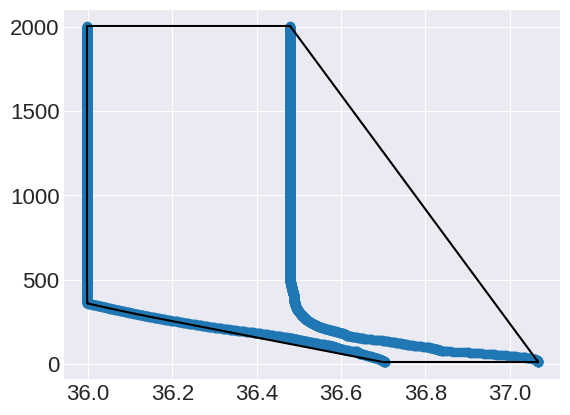

In [321]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

We can see that convex hull is not the best way to define the polygon

## Concave hull

In [322]:
def alpha_shape(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set of points.

    @param points: Iterable container of points.
    @param alpha: alpha value to influence the gooeyness of the border. Smaller
                numbers don't fall inward as much as larger numbers. Too large,
                and you lose everything!
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense in computing an alpha
        # shape.
        return geometry.MultiPoint(list(points)).convex_hull

    def add_edge(edges, edge_points, coords, i, j):
        """Add a line between the i-th and j-th points, if not in the list already"""
        if (i, j) in edges or (j, i) in edges:
            # already added
            return
        edges.add( (i, j) )
        edge_points.append(coords[ [i, j] ])

    coords = np.array([point.coords[0] for point in points])

    tri = Delaunay(coords)
    edges = set()
    edge_points = []
    # loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.simplices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]

        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

        # Semiperimeter of triangle
        s = (a + b + c)/2.0

        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        if area == 0:
            area = 1.000000000154332e-09
        circum_r = a*b*c/(4.0*area)

        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges, edge_points, coords, ia, ib)
            add_edge(edges, edge_points, coords, ib, ic)
            add_edge(edges, edge_points, coords, ic, ia)

    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))

    return unary_union(triangles), edge_points

In [323]:

points = []
for i, value in enumerate(mean_T):
    points.append((value-std_T[i], float(pres[i])))
    points.append((value+std_T[i], float(pres[i])))
points_point = [geometry.Point(xy) for xy in points]

In [324]:
concave_hull, edge_points = alpha_shape(points_point, alpha=0.1)

In [325]:
def plot_polygon(polygon):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    margin = .3

    x_min, y_min, x_max, y_max = polygon.bounds

    ax.set_xlim([x_min-margin, x_max+margin])
    ax.set_ylim([y_min-margin, y_max+margin])
    patch = PolygonPatch(polygon, fc='#999999', ec='#000000', fill=True, zorder=-1)
    ax.add_patch(patch)
    return fig

In [326]:
points = []
x = []
y = []
for i, value in enumerate(mean_T):
    x.append(value-std_T[i])
    x.append(value+std_T[i])
    y.append(float(pres[i]))
    y.append(float(pres[i]))

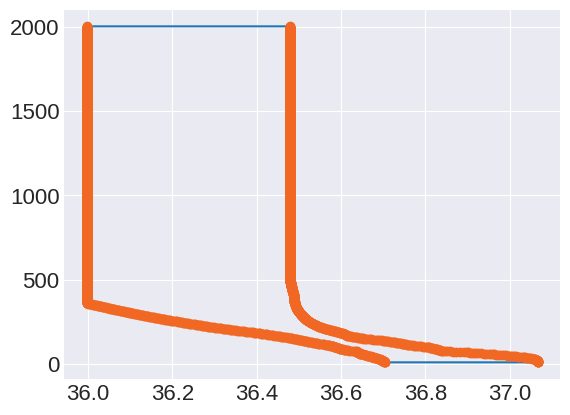

In [327]:
plt.plot(*concave_hull.exterior.xy)
plt.plot(x,y,'o', color='#f16824')

In [328]:
import geopandas as gpd
for nrow in range(0,n_comp):
    
    # extract means
    mean_lon = dfg_means.iloc[nrow,0]
    mean_lat = dfg_means.iloc[nrow,1]
    mean_T = dfg_means.iloc[nrow,6:].values
    
    # extract stdevs
    std_lon = dfg_stds.iloc[nrow,0]
    std_lat = dfg_stds.iloc[nrow,1]
    std_T = dfg_stds.iloc[nrow,6:].values
    points = []
    for i, value in enumerate(mean_T):
        points.append((value-std_T[i], float(pres[i])))
        points.append((value+std_T[i], float(pres[i])))
    points_point = [geometry.Point(xy) for xy in points]
    concave_hull, edge_points = alpha_shape(points_point, alpha=0.1)
    gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[concave_hull])
    gdf.to_file(f'{nrow}.json', driver="GeoJSON")

In [329]:
import folium

colors = {'1': 'green', '2': 'red', '3': 'blue', '4': 'orange', '5': 'black', '6': 'purple'}

folium_map = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
for nrow in range(0,n_comp):
    new_df = df[df['label_sorted'] == nrow]
    for row in new_df.iterrows():
        folium.Marker([row[1]['Latitude'],row[1]['Longitude']], popup='Timberline Lodge',icon=folium.Icon(color=colors[str(nrow+1)])).add_to(folium_map)

folium_map

In [272]:
for row in df.iterrows():
    print(row[1]['Latitude'])

40.331424713134766
34.45087
41.78001022338867
40.397090911865234
36.7503
36.66282
48.4672
36.91647
37.08966
34.024
48.3471
39.26856231689453
33.991
31.59083833333333
31.57388333333333
31.608721666666668
33.743
49.43849
49.14268
43.2432
48.79034
35.43040466308594
42.75116729736328
43.23145294189453
45.00863265991211
35.58441162109375
42.764739990234375
30.143
30.452
34.74886
36.41300582885742
41.75565719604492
34.92158
42.30644226074219
34.96239
30.375455
41.62105941772461
41.47244644165039
45.00383758544922
34.77219
38.279727935791016
46.810768127441406
38.295108795166016
43.3002
30.21125
40.95623016357422
30.13299
43.25463485717773
42.80817031860352
30.269331666666663
41.53532409667969
44.24249267578125
45.399208068847656
43.87063980102539
45.65237808227539
45.68822860717773
41.993
33.43061828613281
44.12990188598633
44.318153381347656
37.24838
33.40607070922852
33.005116666666666
42.744
33.56818771362305
32.908458333333336
33.12639166666666
43.4974
38.17884
46.53264236450195
47.04234

In [183]:
print(gdf)

                                            geometry
0  POLYGON ((6.43322 845.00000, 6.36674 850.00000...


In [158]:
shapely.to_geojson(concave_hull)

'{"type":"Polygon","coordinates":[[[6.4332167717608995,845.0],[6.366738848476058,850.0],[6.300559991067218,855.0],[6.235355500490617,860.0],[6.173137827901525,865.0],[6.108178504111061,870.0],[6.044080612510715,875.0],[5.9801802435027405,880.0],[5.91512769951809,885.0],[5.850917513468013,890.0],[5.789170037496889,895.0],[5.729924469691546,900.0],[5.673148595846026,905.0],[5.616600707560044,910.0],[5.557174711106758,915.0],[5.499175016729537,920.0],[5.440192347284595,925.0],[5.383513690888517,930.0],[5.327354319554965,935.0],[5.273277064086641,940.0],[5.221367170617086,945.0],[5.170254582774686,950.0],[5.121120241291013,955.0],[5.071146177027064,960.0],[5.022051190407421,965.0],[4.972970145023722,970.0],[4.924510301313545,975.0],[4.874694712563729,980.0],[7.308145508683786,980.0],[7.3784594004174116,975.0],[7.449523741012903,970.0],[7.520764903365192,965.0],[7.591703268984146,960.0],[7.6623095909249095,955.0],[7.732940146915378,950.0],[7.803727894311258,945.0],[7.872253232651384,940.0],

In [163]:
np.expand_dims(Xpca[0], axis=0)

array([[-13.80013955,  -0.08853599,  -0.80238578,   0.14671267,
         -0.12114548,  -0.11663431]])

In [166]:
dump(grid_search, 'gmm_model.joblib') 

['gmm_model.joblib']

In [167]:
dump(pca, 'pca.joblib') 

['pca.joblib']

In [164]:
grid_search.predict(np.expand_dims(Xpca[0], axis=0))

array([1])